   accuracy  precision    recall        f1   roc_auc                model
0  0.758884   0.697354  0.543723  0.603452  0.827363  Logistic Regression
1  0.718297   0.590701  0.614935  0.598927  0.693992        Decision Tree
2  0.762163   0.687210  0.586147  0.625908  0.819931        Random Forest
3  0.763749   0.705449  0.553030  0.613446  0.827596                  SVM


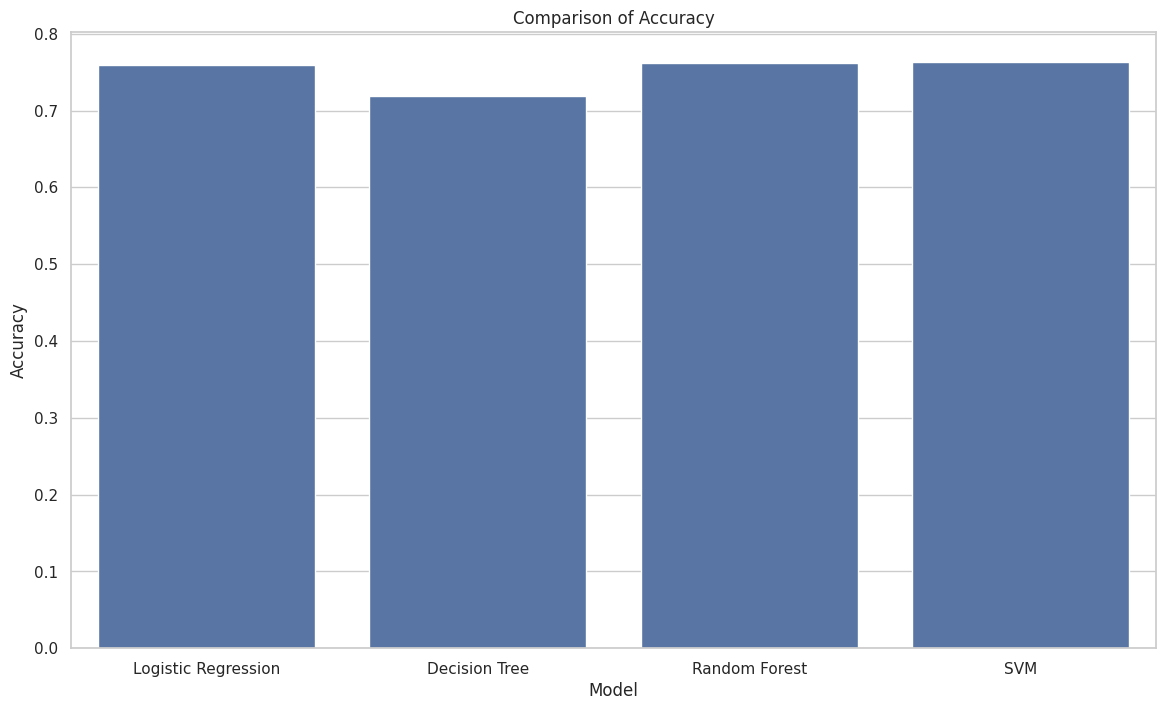

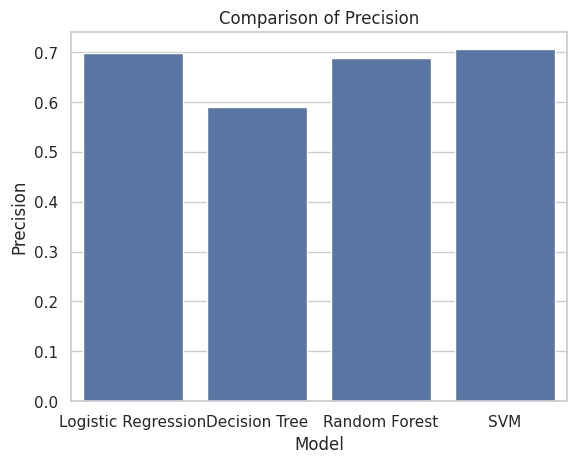

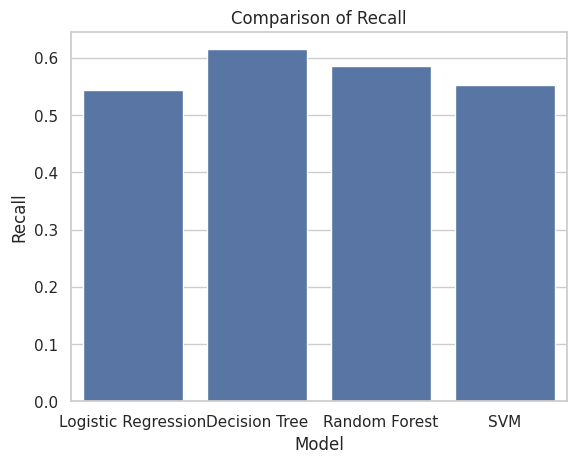

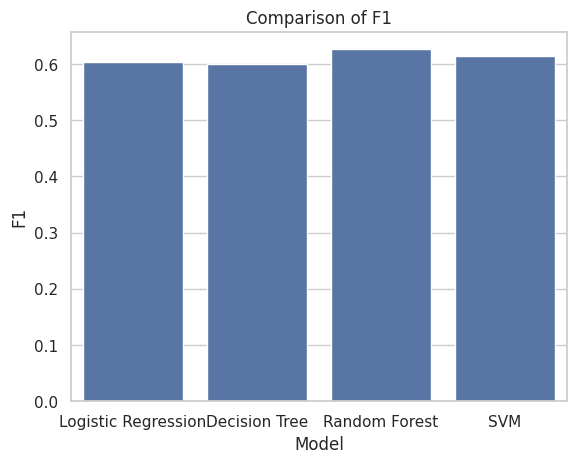

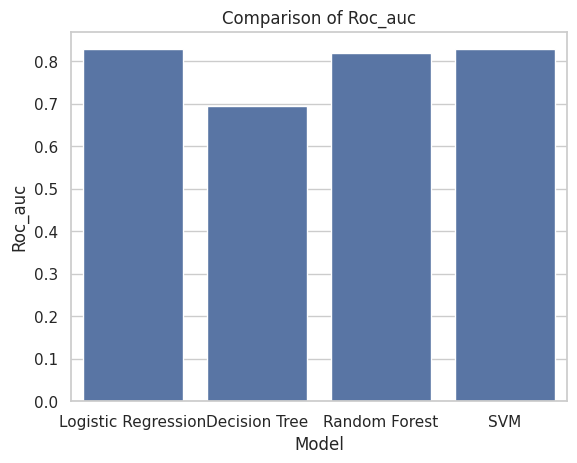

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Initialize cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Store results
results = {metric: [] for metric in metrics}
results['model'] = []

# Cross-validation
for name, model in models.items():
    results['model'].append(name)
    for metric in metrics:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric)
        results[metric].append(np.mean(cv_results))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for metric in metrics:
    sns.barplot(x="model", y=metric, data=results_df)
    plt.title(f'Comparison of {metric.capitalize()}')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Model')
    plt.show()
